<a href="https://colab.research.google.com/github/nityanandbhushan/Machine_Learning_Projects/blob/main/Hate_Speech_Detection_Using_Twitter_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [ ]:
tweet_df = pd.read_csv('labeled_data.csv')

In [ ]:
tweet_df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
tweet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


Printing the data of first 5 rows

In [ ]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 

!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!! 

!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit 

!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny 

!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361; 



DATA CLEANING

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
def data_processing(tweet):
  tweet = tweet.lower()
  tweet = re.sub(r"https\S+|www\S+http\S+", '',  tweet, flags = re.MULTILINE)
  tweet = re.sub(r'\@w+|\#', '', tweet)
  tweet = re.sub(r'[^\w\s]', '', tweet)
  tweet = re.sub(r'ð', '', tweet)
  tweet_tokens = word_tokenize(tweet)
  filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
  return " ".join(filtered_tweets)

Pre-Processing to the text data

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')
tweet_df.tweet = tweet_df['tweet'].apply(data_processing)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tweet_df = tweet_df.drop_duplicates('tweet')

Lemmatizing the Data

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
  tweet = [lemmatizer.lemmatize(word) for word in data]
  return data

In [ ]:
nltk.download('wordnet')
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

rt mayasolovely woman shouldnt complain cleaning house amp man always take trash 

rt mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place 

rt urkindofbrand dawg rt 80sbaby4life ever fuck bitch start cry confused shit 

rt c_g_anderson viva_based look like tranny 

rt shenikaroberts shit hear might true might faker bitch told ya 57361 



In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24698 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24698 non-null  int64 
 1   count               24698 non-null  int64 
 2   hate_speech         24698 non-null  int64 
 3   offensive_language  24698 non-null  int64 
 4   neither             24698 non-null  int64 
 5   class               24698 non-null  int64 
 6   tweet               24698 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.5+ MB


In [ ]:
tweet_df['label'].value_counts()

0    27352
1     1993
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

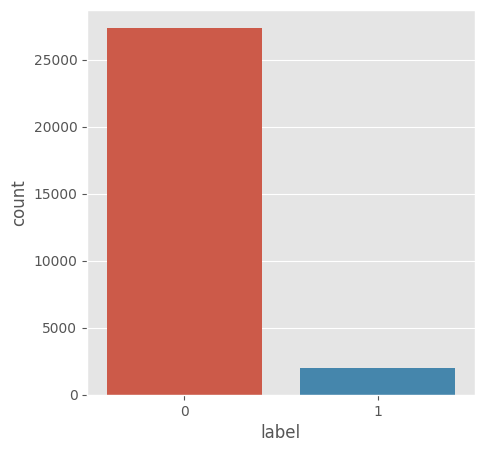

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

Text(0.5, 1.0, 'Distribution of Sentiments')

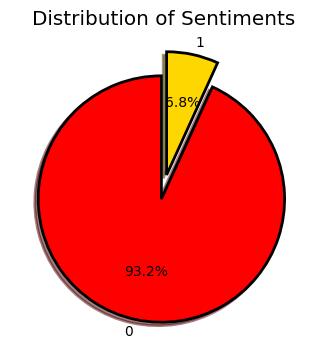

In [ ]:
fir = plt.figure(figsize=(4,4))
colors=("red", "gold")
wp={'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['label'].value_counts()
explode=(0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of Sentiments")

In [ ]:
non_hate_tweets = tweet_df[tweet_df.label==0]
non_hate_tweets.head()

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause do...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


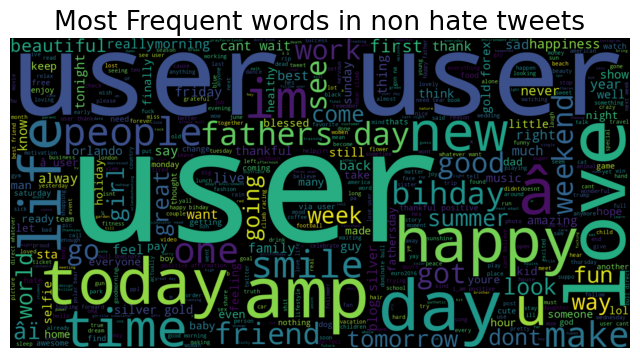

In [ ]:
from wordcloud import WordCloud
text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(8,5), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent words in non hate tweets', fontsize=19)
plt.show()

Create TF-IDFVectorizer and Bi-Gram Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet_df['tweet'])


In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))

Number of features: 208579

First 20 features:
['0000001' '0000001 polluting' '00027' '00027 photooftheday' '001' '0035'
 '00h30' '01' '01 4995' '01 7900' '01 blog' '01 croatia' '01 may'
 '01 shopalyssas' '0115' '0115 8599968' '0161' '0161 manny' '019'
 '019 previous']


In [ ]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['tweet'])

In [ ]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))

Number of features: 380305

First 20 features:
['0000001' '0000001 polluting' '0000001 polluting niger' '00027'
 '00027 photooftheday' '00027 photooftheday music' '001' '0035' '00h30'
 '01' '01 4995' '01 4995 rustic' '01 7900' '01 7900 shopalyssas' '01 blog'
 '01 blog silver' '01 croatia' '01 croatia happy' '01 may' '01 may actual']


Model Training and Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X = tweet_df['tweet']
Y = tweet_df['label']
X = vect.transform(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (23476, 380305)
Size of y_train: (23476,)
Size of x_test: (5869, 380305)
Size of y_test: (5869,)


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict1 = logreg.predict(x_train)
logreg_acc1 = accuracy_score(logreg_predict1, y_train)
print("Training Accuracy: {:.2f}%".format(logreg_acc1*100))
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Training Accuracy: 93.69%
Test Accuracy: 93.17%


In [ ]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[5458    0]
 [ 401   10]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5458
           1       1.00      0.02      0.05       411

    accuracy                           0.93      5869
   macro avg       0.97      0.51      0.51      5869
weighted avg       0.94      0.93      0.90      5869



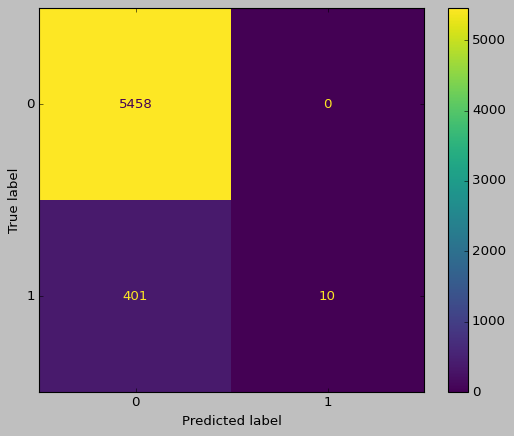

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

Grid Search CV HyperParameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver':['newton-cg', 'lbfgs', 'liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross Validation Score: {:.2f}".format(grid.best_score_))
print("Best Parameters: ", grid.best_params_)

Best Cross Validation Score: 0.95
Best Parameters:  {'C': 100, 'solver': 'newton-cg'}


In [ ]:
y_pred = grid.predict(x_test)

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 94.89%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[5450    8]
 [ 292  119]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5458
           1       0.94      0.29      0.44       411

    accuracy                           0.95      5869
   macro avg       0.94      0.64      0.71      5869
weighted avg       0.95      0.95      0.94      5869

